In [36]:
import pandas as pd

df_raw = pd.read_csv('./ss/WA_house_data.csv')

In [37]:
zip_df =  pd.read_csv(r'/content/ss/population_by_zip_2010.csv').groupby('zipcode')['population'].max().reset_index()
df_raw = df_raw.merge(zip_df, left_on='zipcode', right_on='zipcode', how='left') #Relational Join

In [38]:
df = df_raw.query('bathrooms <=5 and bedrooms <=7 and sqft_living <= 4500 and price<1500000')

In [39]:
from sklearn.model_selection import train_test_split
#Split - Train/Test
x_train, x_test, y_train, y_test = train_test_split(df[['bedrooms', 'bathrooms', 'sqft_living',
                                                        'floors', 'view', 'condition', 'grade',
                                                       'sqft_basement', 'yr_built', 'yr_renovated']], df['price'], test_size=.2,
                                                   random_state=0)

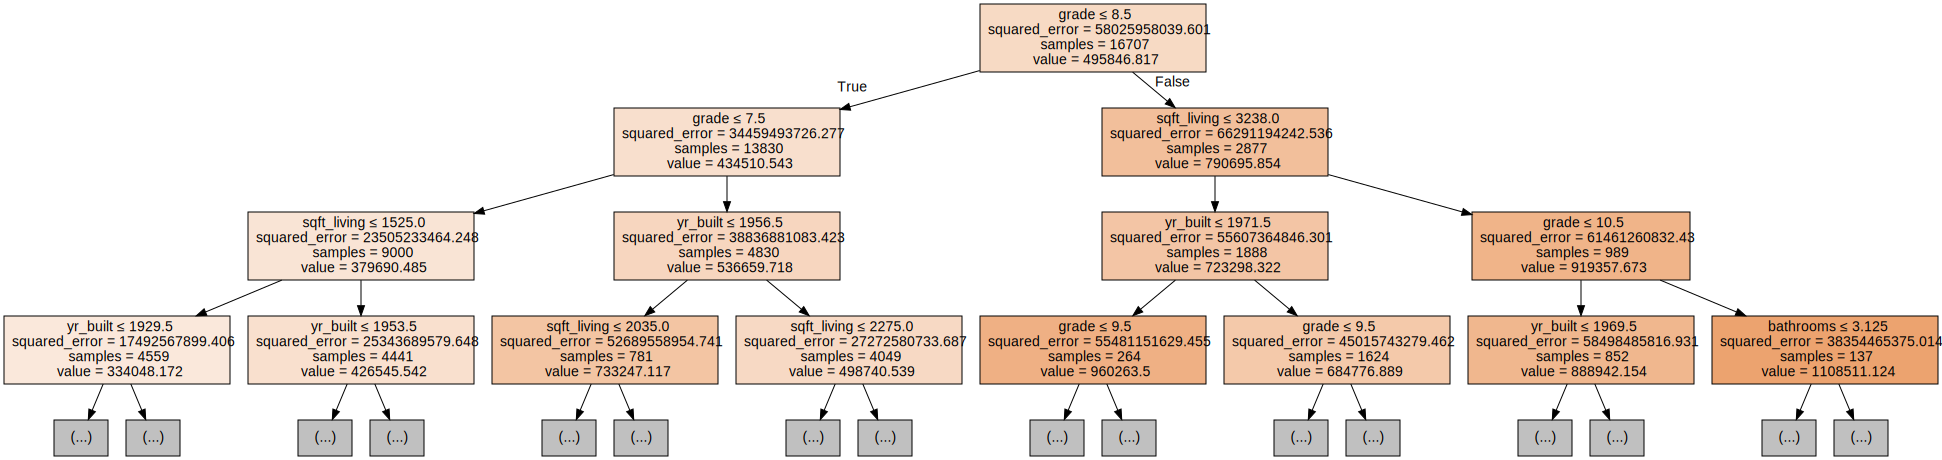

In [40]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz
clf = DecisionTreeRegressor()
clf.fit(x_train,y_train)

feature_names = list(x_train.columns)  # Adjust this based on your actual feature names

dot_data = tree.export_graphviz(clf, out_file=None, max_depth=3,
                                feature_names=feature_names, label='all',
                                filled=True, special_characters=True)


graph = graphviz.Source(dot_data, filename='regressor_tree3', format='pdf')
graph.render(view=True)
graph